<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Для работы мы имеем таблицу с параметрами квартир в объявлениях. Данные нуждаются в предварительной обработке.

**Цель исследования:** изучение этих параметров для определения рыночной стоимости.

**Описание данных:**

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head(15))

data.info()
print()

display(data.describe().T)
print()

data.sample(8, random_state=50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19046,16,5700000.0,81.1,2018-11-13T00:00:00,4,2.65,9.0,57.3,1,NaN,...,8.9,5.0,Санкт-Петербург,13289.0,12086.0,0.0,NaN,0.0,NaN,23.0
1971,15,4350000.0,44.8,2018-06-15T00:00:00,2,2.50,5.0,26.3,3,NaN,...,5.5,NaN,Санкт-Петербург,17517.0,15904.0,1.0,979.0,0.0,NaN,319.0
3126,17,5000000.0,59.9,2015-11-09T00:00:00,2,2.65,22.0,36.1,6,NaN,...,12.5,0.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,679.0
10872,20,7000000.0,73.9,2018-02-01T00:00:00,2,2.75,17.0,28.0,17,NaN,...,27.9,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,27.0
2151,1,5430000.0,93.5,2016-01-23T00:00:00,4,NaN,19.0,63.1,18,False,...,12.6,0.0,Санкт-Петербург,42114.0,21430.0,0.0,NaN,1.0,456.0,281.0
2802,7,14950000.0,50.0,2016-03-06T00:00:00,2,4.80,3.0,30.0,2,NaN,...,10.0,0.0,Санкт-Петербург,24433.0,1725.0,1.0,589.0,3.0,161.0,160.0
4523,19,4000000.0,40.0,2018-08-22T00:00:00,1,NaN,16.0,16.5,12,NaN,...,11.4,NaN,Санкт-Петербург,23274.0,12138.0,1.0,1103.0,1.0,1087.0,85.0
8456,17,12000000.0,90.4,2018-06-01T00:00:00,3,2.80,10.0,51.4,10,NaN,...,11.8,NaN,Санкт-Петербург,50747.0,14697.0,1.0,543.0,0.0,NaN,NaN


### Вывод

Данные в исходном виде были склеены в одну строку, а не разделены по колонкам. Было необходимо разобраться с разделителями в формате csv с помощью параметра sep.

**При изучении данных из таблицы были выявлены следующие проблемы:**
   
   - некорректное название столбца cityCenters_nearest - надо переименовать.
   - отсутствующие значения во многих колонках, что может быть связано с отсутствием необходимости заполнять определенную информацию или отсутствием данного параметра у квартиры, например, наличия аэропорта или пруда поблизости. В таком случае, появление пропусков не является случайным, и если заполнить эти данные какими-либо своими значениями, можно исказить результаты.
   - такие данные, как количество дней размещения объявления, количество этажей, балконов - вещественные числа, необходимо привести их к целочисленному виду.
   - тип данных даты публикации объявлений - строки, требуется перевести их в даты.

## Предобработка данных

Обработаем пропуски.

Выявим, в каких столбцах они встречаются, и их количество и объем в процентах:

In [4]:
print(data.isna().sum())
print()

print(data[data['living_area'].isna()].head())
print()

print(round(data.isna().sum() * 100 / len(data), 2))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

    total_images  last_price  total_area first_day_exposition  rooms  \
3              0  64900000.0       159.0  2015-07-24T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
30            12   2200000.0        32.8  2018-02-19T00:00:00      1   
37            10   1990000.0        45

Пропуски в колонке ceiling_height можно заменить медианным значением по столбцу и проверить результат по ячейке, где было отсутствующее значение:

In [5]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
print(data.loc[3, 'ceiling_height'])

2.65


В столбце floors_total и locality_name количество пропусков небольшое и напрямую не связано со стоимостью, поэтому можно удалить в нем строки с пропусками методом dropna().

In [6]:
data.dropna(subset=['floors_total', 'locality_name'], inplace=True)
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64


Значения по площади сильно различаются, поэтому заполним пропуски в колонке living_area средними значениями по категориям в зависимости от количества комнат, прежде выяснив сколько комнат встречается в таблице:

In [7]:
print(data['rooms'].value_counts())
print()

def rooms_category(rooms):
    if rooms == 0:
        return '1'
    if rooms == 1:
        return '1'   
    if rooms == 2:
        return '2'
    if rooms == 3:
        return '3'
    if rooms == 4:
        return '4'
    if rooms == 5:
        return '5'
    return 'более 5-ти'

data['rooms_category'] = data['rooms'].apply(rooms_category)

data['living_area'].fillna(0, inplace=True)

data.loc[(data['living_area'] == 0) & (data['rooms_category'] == '1'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[0]
data.loc[(data['living_area'] == 0) & (data['rooms_category'] == '2'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[1]
data.loc[(data['living_area'] == 0) & (data['rooms_category'] == '3'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[2]
data.loc[(data['living_area'] == 0) & (data['rooms_category'] == '4'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[3]
data.loc[(data['living_area'] == 0) & (data['rooms_category'] == '5'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[4]
data.loc[(data['living_area'] == 0) & (data['rooms_category'] == 'более 5-ти'), 'living_area'] = data.groupby('rooms_category')['living_area'].mean()[5]

display(data.head(8))

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rooms_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,43.767150,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.400000,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,1
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.600000,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,1
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,29.192352,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,2


Проделаем те же действия с колонкой kitchen_area и проверим результат по ячейке, где был пропуск:

In [8]:
data['kitchen_area'].fillna(0, inplace=True)

data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == '1'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[0]
data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == '2'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[1]
data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == '3'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[2]
data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == '4'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[3]
data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == '5'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[4]
data.loc[(data['kitchen_area'] == 0) & (data['rooms_category'] == 'более 5-ти'), 'kitchen_area'] = data.groupby('rooms_category')['kitchen_area'].mean()[5]

print(data.loc[3, 'kitchen_area'])

10.466322893234107


 Посмотрим количество уникальных значений в колонке is_apartment и заменим пропуски там на наиболее часто встречающиеся:

In [9]:
data['is_apartment'].value_counts()

data['is_apartment'].fillna(False, inplace=True)
print(data.loc[3, 'is_apartment'])

False


Пропуски в данных с количеством балконов заменим на 0, т.к. скорее всего, они означают отсутствие балконов:

In [10]:
data['balcony'].fillna(0, inplace=True)
print(data.loc[3, 'balcony'])

0.0


Пропуски в колонках ниже, возможно, обусловлены тем, что данные параметры не являются существенными, поэтому оставим их:

airports_nearest,
cityCenters_nearest,
parks_around3000,
parks_nearest,
ponds_around3000,
ponds_nearest,
days_exposition.

In [11]:
print(data.loc[30])
print()
print(data.loc[7, 'days_exposition'])

total_images                             12
last_price                          2.2e+06
total_area                             32.8
first_day_exposition    2018-02-19T00:00:00
rooms                                     1
ceiling_height                         2.65
floors_total                              9
living_area                         16.4866
floor                                     2
is_apartment                          False
studio                                False
open_plan                             False
kitchen_area                        8.37639
balcony                                   0
locality_name                      Коммунар
airports_nearest                        NaN
cityCenters_nearest                     NaN
parks_around3000                        NaN
parks_nearest                           NaN
ponds_around3000                        NaN
ponds_nearest                           NaN
days_exposition                          63
rooms_category                  

Изменим типы данных:

In [12]:
data['floors_total'] = np.int32(data['floors_total'])
data['balcony'] = np.int32(data['balcony'])
data['days_exposition'] = np.int32(data['days_exposition'])

display(data.head())
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,rooms_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-2147483648,3
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,2
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,43.76715,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,3
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null int32
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null int32
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
cityCenters_nearest     18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around3000    

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


Переименуем столбец:

In [14]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
display(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'rooms_category'],
      dtype='object')

**Итоги:**

Изучили пропуски в данных и обработали их в зависимости от значимости для исследования информации в этих столбцах: в некоторых случаях их можно удалить, где-то заменить медианными или средними значениями, а в некоторых - заполнить нулями.

Тип данных для количества дней размещения объявления и количества этажей и балконов привели к целочисленному виду.

Тип данных даты публикации объявлений перевели из строки в дату.

Переименовали столбец cityCenters_nearest на city_centers_nearest.

## Расчёты и добавление результатов в таблицу

**Посчитаем и добавим в таблицу:**

   - цену квадратного метра - meter_price;
   - день недели, месяц и год публикации объявления - weekday, month, year;
   - этаж квартиры - floor_category (первый, последний, другой);
   - соотношение жилой и общей площади - living_area_ratio;
   - соотношение площади кухни к общей - kitchen_area_ratio.

In [15]:
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = np.int32(data['meter_price'])

data['weekday'] = data['first_day_exposition'].dt.weekday

data['month'] = data['first_day_exposition'].dt.month

data['year'] = data['first_day_exposition'].dt.year

def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis=1)

data['living_area_ratio'] = data['living_area'] / data['total_area']

data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,rooms_category,meter_price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,-2147483648,3,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81,1,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558,2,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,43.767150,9,False,...,234.0,424,3,408176,4,7,2015,другой,0.275265,0.065826
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121,2,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,55,1,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,NaN,155,1,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,29.192352,22,False,...,NaN,-2147483648,2,110544,3,4,2019,другой,0.407714,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,189,1,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,289,3,88524,6,2,2017,другой,0.714754,0.106557


**Итог:** добавили необходимые для дальнейшего исследования параметры.

## Исследовательский анализ данных

- Изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Получим представление о выборке с помощью числового описания данных методом describe() и гистограмм.

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


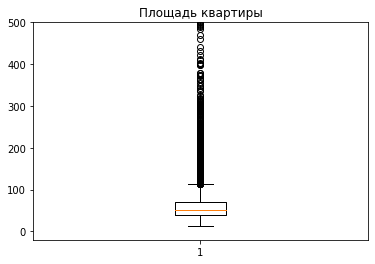

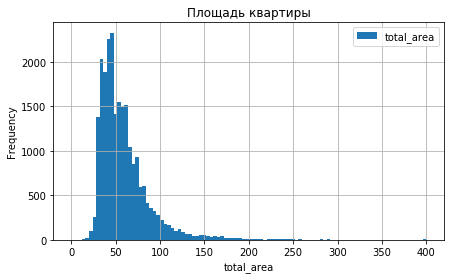

Text(0.5, 1.0, 'Площадь квартиры')

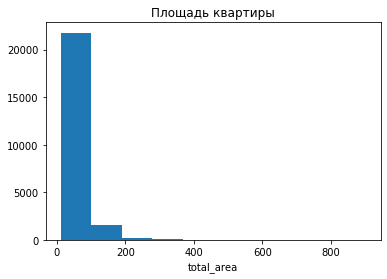

In [16]:
print(data['total_area'].describe())

plt.boxplot(data['total_area'])
plt.ylim(-20, 500)
plt.title('Площадь квартиры')

data.plot(y = 'total_area', kind = 'hist', bins = 100, range = (0, 400), grid=True, figsize = (7,4), title='Площадь квартиры')
plt.xlabel('total_area')
plt.show()

plt.hist(data['total_area'])
plt.xlabel('total_area')
plt.title('Площадь квартиры')

**Итоги по площади квартир:** похоже на распределение Пуассона, есть выбросы.

Минимальная площадь квартир - 12 м², максимальная - 900 м², среднее значение - 60 м², а медиана - 52 м².

Удалим выбросы по площади квартиры:

count    23502.000000
mean        59.399535
std         30.432473
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        297.500000
Name: total_area, dtype: float64


Text(0.5, 0, 'total_area')

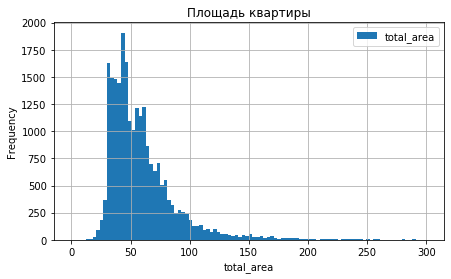

In [17]:
data = data[data['total_area'] < 300]
data = data.reset_index(drop=True)

print(data['total_area'].describe())

data.plot(y = 'total_area', kind = 'hist', bins = 100, range = (0, 300), grid=True, figsize = (7,4), title='Площадь квартиры')
plt.xlabel('total_area')

count    2.350200e+04
mean     6.298853e+06
std      7.767448e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64


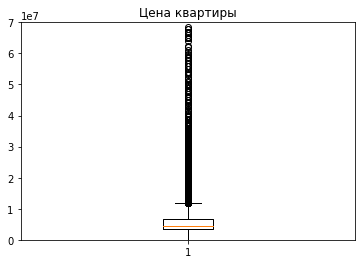

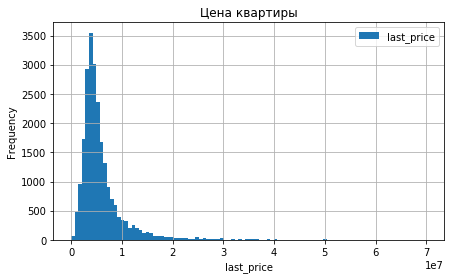

Text(0.5, 1.0, 'Цена квартиры')

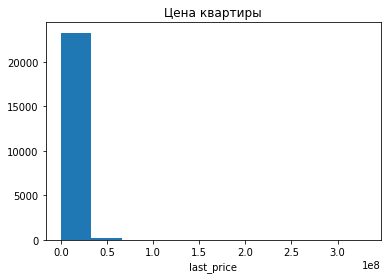

In [18]:
print(data['last_price'].describe())

plt.boxplot(data['last_price'])
plt.ylim(0, 70000000)
plt.title('Цена квартиры')

data.plot(y = 'last_price', kind = 'hist', bins = 100, range = (0, 70000000), grid=True, figsize = (7,4), title='Цена квартиры')
plt.xlabel('last_price')
plt.show()

plt.hist(data['last_price'])
plt.xlabel('last_price')
plt.title('Цена квартиры')

**Итоги по цене квартир:** есть выбросы.

Минимальная стоимость квартир составляет 1,2 млн. руб., максимальная - 7,5 млн. руб., средняя стоимость - 6,5 млн. руб., а медиана - 4,6 млн. руб.

Удалим выбросы по цене:

count    2.322900e+04
mean     5.719414e+06
std      3.988665e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.625000e+06
max      2.999900e+07
Name: last_price, dtype: float64


Text(0.5, 0, 'last_price')

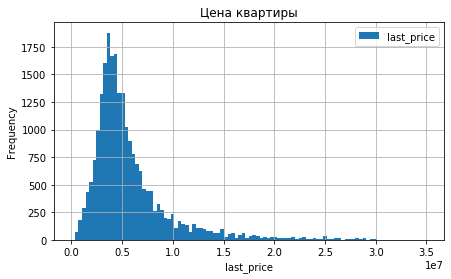

In [19]:
data = data[data['last_price'] < 30000000]
data = data.reset_index(drop=True)

print(data['last_price'].describe())

data.plot(y = 'last_price', kind = 'hist', bins = 100, range = (0, 35000000), grid=True, figsize = (7,4), title='Цена квартиры')
plt.xlabel('last_price')

count    23229.000000
mean         2.036980
std          1.020271
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64


Text(0.5, 0, 'rooms')

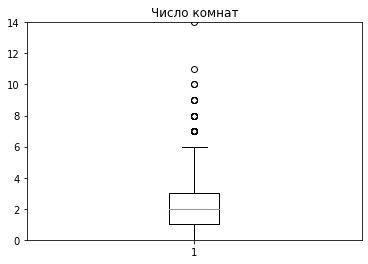

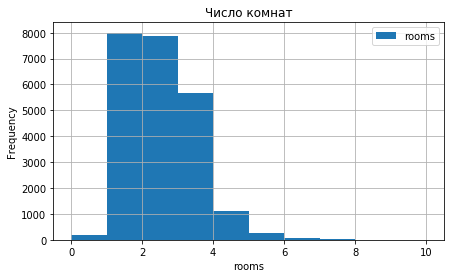

In [20]:
print(data['rooms'].describe())

plt.boxplot(data['rooms'])
plt.ylim(0, 14)
plt.title('Число комнат')

data.plot(y = 'rooms', kind = 'hist', bins = 10, range = (0, 10), grid=True, figsize = (7,4), title='Число комнат')
plt.xlabel('rooms')

**Итоги по числу комнат в квартирах:** распределение Пуассона.

Минимальное число комнат - 1, максимальное - 19, среднее - 2.

Удалим выбросы по числу комнат:

count    23106.000000
mean         2.011945
std          0.957769
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64


Text(0.5, 0, 'rooms')

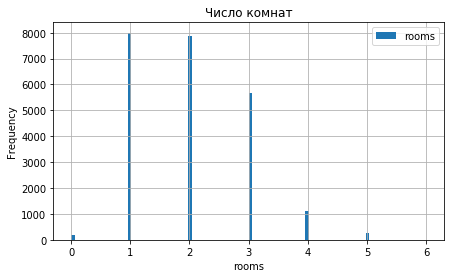

In [21]:
data = data[data['rooms'] < 6]
data = data.reset_index(drop=True)

print(data['rooms'].describe())

data.plot(y = 'rooms', kind = 'hist', bins = 100, range = (0, 6), grid=True, figsize = (7,4), title='Число комнат')
plt.xlabel('rooms')

count    23106.000000
mean         2.717245
std          0.996991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


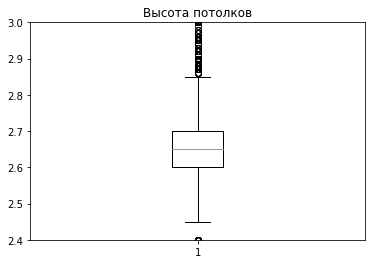

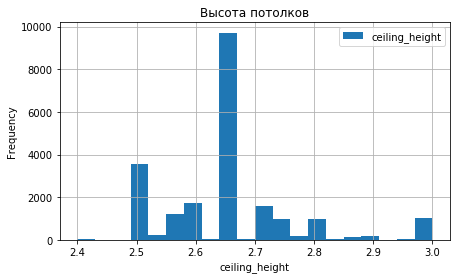

In [22]:
print(data['ceiling_height'].describe())

plt.boxplot(data['ceiling_height'])
plt.ylim(2.4, 3.0)
plt.title('Высота потолков')


data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, range = (2.4, 3.0), grid=True, figsize = (7,4), title='Высота потолков')
plt.xlabel('ceiling_height')
plt.show()

**Итог по высоте потолков в квартирах:** распределение нормальное.

Минимальная высота - 1 м, максимальная - 100 м, среднее значение - 2,7 м, а медиана - 2,6 м.

Уберем выбросы по высоте потолков:

count    21765.000000
mean         2.651482
std          0.115643
min          2.400000
25%          2.600000
50%          2.650000
75%          2.650000
max          3.000000
Name: ceiling_height, dtype: float64


Text(0.5, 0, 'ceiling_height')

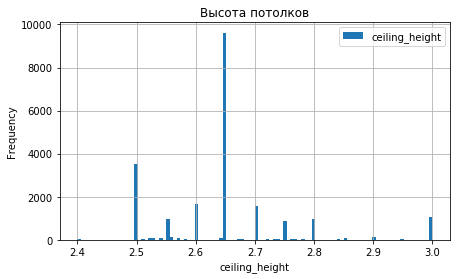

In [23]:
data = data.query('ceiling_height >= 2.4 and ceiling_height <= 3.0')

print(data['ceiling_height'].describe())

data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, range = (2.4, 3.0), grid=True, figsize = (7,4), title='Высота потолков')
plt.xlabel('ceiling_height')

- Следующим шагом изучим время продажи квартиры. Посчитаем среднее и медиану.

count    2.176500e+04
mean    -2.718270e+08
std      7.140573e+08
min     -2.147484e+09
25%      2.300000e+01
50%      7.200000e+01
75%      1.920000e+02
max      1.580000e+03
Name: days_exposition, dtype: float64


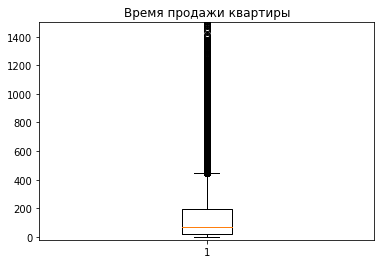

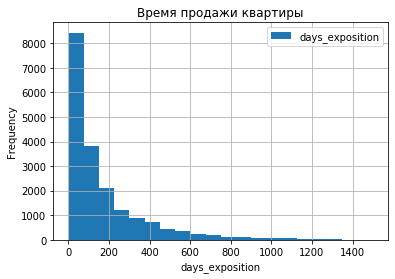

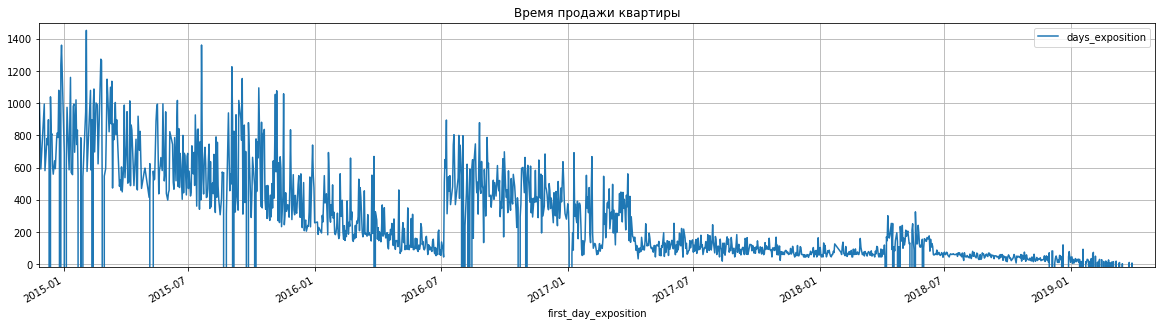

In [24]:
print(data['days_exposition'].describe())

plt.boxplot(data['days_exposition'])
plt.ylim(-20, 1500)
plt.title('Время продажи квартиры')

data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True, range = (1, 1500), title='Время продажи квартиры')
plt.xlabel('days_exposition')

(
data.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='median')
.plot(ylim=(-20, 1500), grid=True, figsize=(20, 5), title='Время продажи квартиры')
)

**Итоги:**

Согласно диаграмме размаха, видно, что есть квартиры, которые продавались значительно дольше медианного времени. Метод describe() показывает большую разницу между медианным и средним значениями, а также отрицательные значения, что похоже на аномалии.

На гистограмме также прослеживаются выбивающиеся значения.

Судя по графику на основе сводной таблицы, в 2015 г. квартиры продавались дольше, почти так же было и после 2016 г.

- В следующем шаге уберем редкие и выбивающиеся значения.

Для начала применим метод value_counts()

In [25]:
(data['days_exposition'].value_counts()).head(8)

-2147483648    2755
 45             866
 60             518
 7              226
 30             194
 90             162
 4              161
 3              152
Name: days_exposition, dtype: int64

По результатам наблюдается большое количество объявлений, снятых через 45, 60, 7, 30 и 90 дней. Методом query() уберем эти аномалии из выборки, так же, как выбросы после отметки 1200.

И снова взглянем на числовое описание данных и графики.

count    16973.00000
mean       184.50492
std        208.41289
min          1.00000
25%         43.00000
50%        110.00000
75%        244.00000
max       1199.00000
Name: days_exposition, dtype: float64


Text(0.5, 0, 'days_exposition')

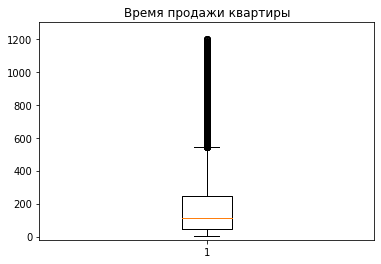

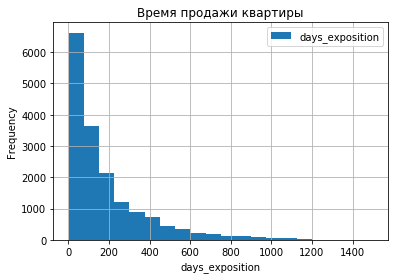

In [26]:
data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != -2147483648 and days_exposition < 1200')

print(data['days_exposition'].describe())

plt.boxplot(data['days_exposition'])
plt.ylim(-20, 1300)
plt.title('Время продажи квартиры')

data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid = True, range = (1,1500), title='Время продажи квартиры')
plt.xlabel('days_exposition')

**Итоги:**

После фильтрации данных значения выровнялись, теперь медианное время продажи квартиры составляет 109 дней, а среднее - 178.

- Теперь изучим, какие факторы больше всего влияют на стоимость квартиры: зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Зависимость цены от площади:

0.08642624999674248

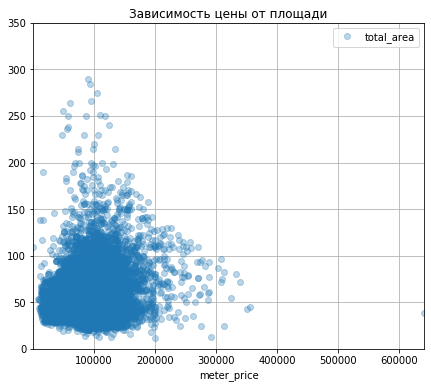

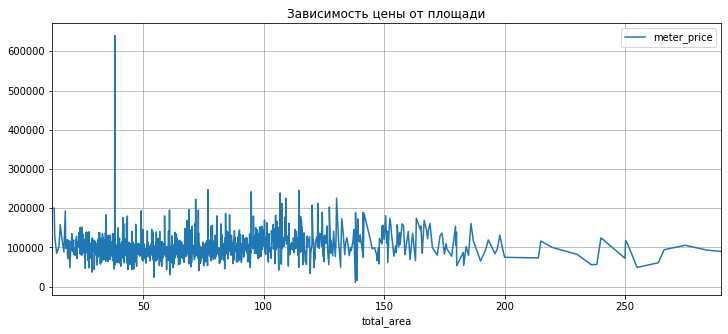

In [27]:
data.plot(x='meter_price', y='total_area', style='o', ylim=(0, 350), grid=True, figsize=(7, 6), alpha=0.3, title='Зависимость цены от площади')

(
data
.pivot_table(index='total_area', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(12, 5), title='Зависимость цены от площади')
)

data['total_area'].corr(data['meter_price'])

**Итоги**:

Коэффициент корреляции Пирсона близок к нулю, значит, линейная связь слабая. По графикам также зависимость цены за квадратный метр от площади сильно не заметна.

Зависимость цены от числа комнат:

-0.12507663184106066

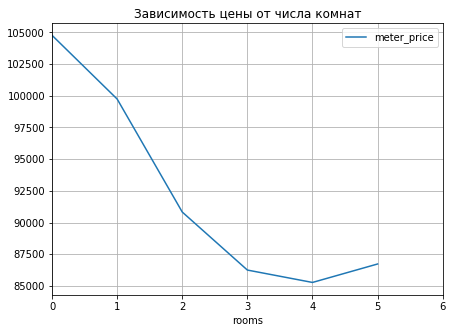

In [28]:
(
data
.pivot_table(index='rooms', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(0, 6), figsize=(7, 5), title='Зависимость цены от числа комнат')
)

data['rooms'].corr(data['meter_price'])

**Итоги:**

Самая высокая стоимость квадратного метра у 1-комнатной квартиры, и по сравнению с ней сильно снижена у  3-хкомнатной квартиры.

Зависимость цены от удалённости от центра:

count    13012.000000
mean     14973.690209
std       8359.177822
min        399.000000
25%      10717.750000
50%      13554.000000
75%      16622.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


-0.3959125775643529

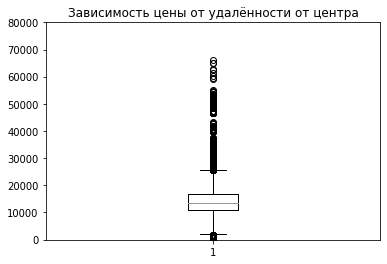

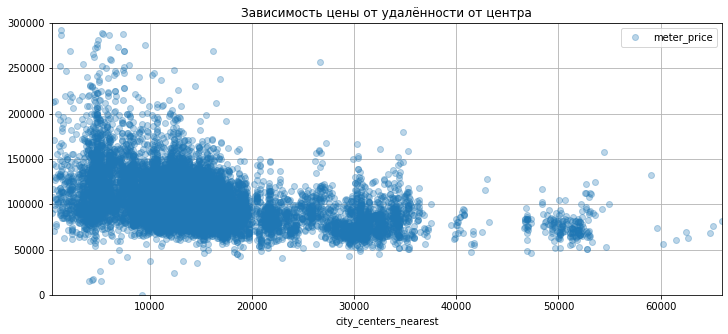

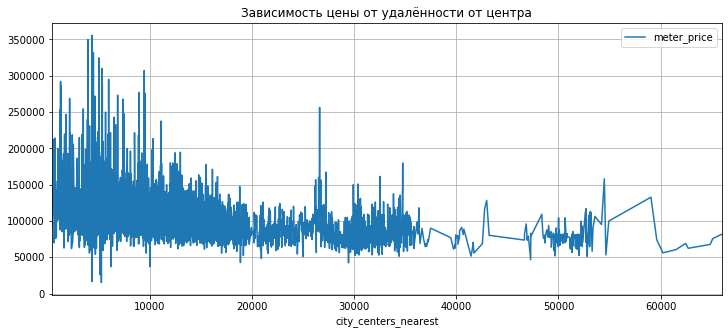

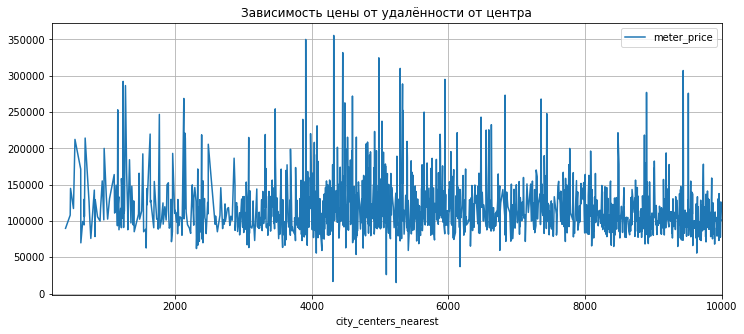

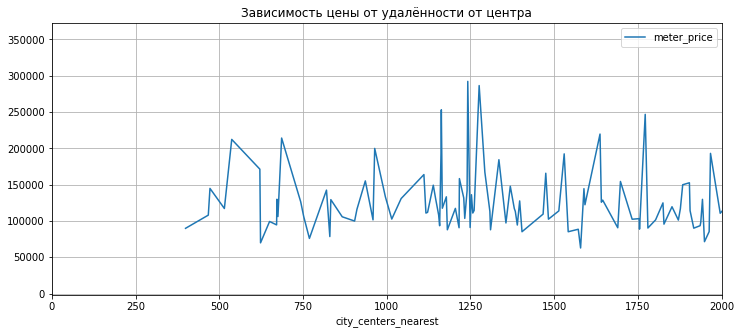

In [29]:
data = data.query('city_centers_nearest > 0')

print(data['city_centers_nearest'].describe())

plt.boxplot(data['city_centers_nearest'])
plt.ylim(-100, 80000)
plt.title('Зависимость цены от удалённости от центра')

data.plot(x='city_centers_nearest', y='meter_price', style='o', ylim=(0, 300000), grid=True, figsize=(12, 5), alpha=0.3, title='Зависимость цены от удалённости от центра')

(
data
.pivot_table(index='city_centers_nearest', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(12, 5), title='Зависимость цены от удалённости от центра')
)

(
data
.pivot_table(index='city_centers_nearest', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(200, 10000), figsize=(12, 5), title='Зависимость цены от удалённости от центра')
)

(
data
.pivot_table(index='city_centers_nearest', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(0, 2000), figsize=(12, 5), title='Зависимость цены от удалённости от центра')
)

data['city_centers_nearest'].corr(data['meter_price'])

**Итоги:**

Чем ближе к центру, тем дороже стоимость квадратного метра, но при том можно найти квартиру дешевле в зависимости от других параметров.

Зависимость цены от этажа (первый, последний или другой):

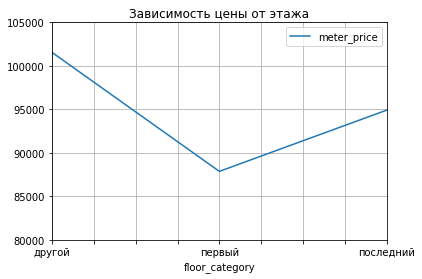

In [30]:
(
data
.pivot_table(index='floor_category', values='meter_price', aggfunc='median')
.plot(grid=True, ylim=(80000, 105000), figsize=(6, 4), title='Зависимость цены от этажа')
)

**Итоги:**

На первом этаже - самые дешевые квартиры, цена на квартиры на последнем этаже повышается, но дороже оцениваются квартиры на других этажах.

Зависимость цены от даты размещения: дня недели, месяца и года.

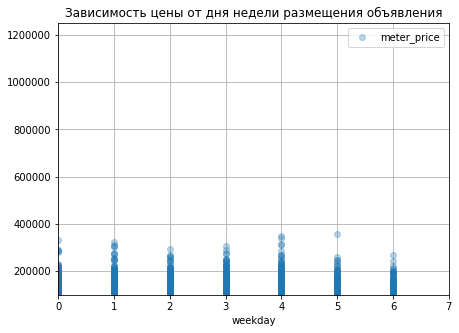

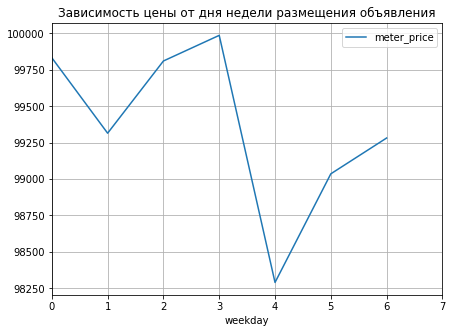

In [31]:
data.plot(x='weekday', y='meter_price', style='o', xlim=(0, 7), ylim=(100000, 1250000), grid=True, figsize=(7, 5), alpha=0.3, title='Зависимость цены от дня недели размещения объявления')

(
data
.pivot_table(index='weekday', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(0, 7), figsize=(7, 5), title='Зависимость цены от дня недели размещения объявления')
)

**Итоги:**

В будние дни и в субботу цена высокая, в пятницу и воскресенье снижается.

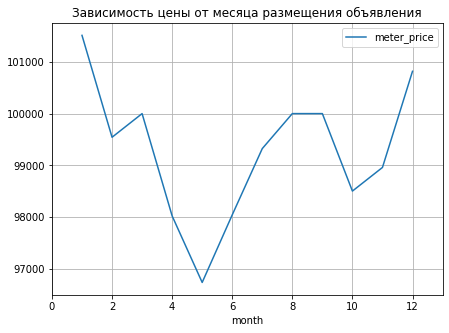

In [32]:
(
data
.pivot_table(index='month', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(0, 13), figsize=(7, 5), title='Зависимость цены от месяца размещения объявления')
)

**Итоги:**

Весной цена достигает своего пика, самое высокое значение - в апреле. Также цена на жилье повышается к концу лета, особенно в августе. В ноябре цена тоже высока, хоть и сравнительно ниже. Невысокие цены на квартиры в мае, июне и октябре.

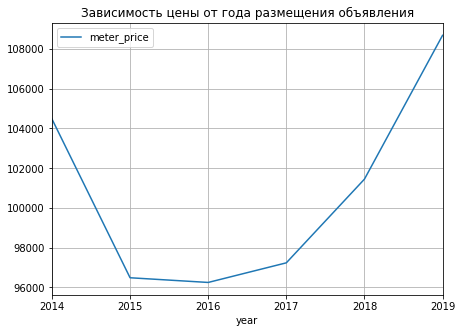

In [33]:
(
data
.pivot_table(index='year', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(7, 5), title='Зависимость цены от года размещения объявления')
)

**Итоги:**

На графике видно, что цена падала с 2014 г., и в 2016 г. показала самое низкое значение, а позже она стала расти, что особенно заметно после 2017 г.

Выведем матрицу корреляций по параметрам:

In [34]:
print(data.corr())

                      total_images  last_price  total_area     rooms  \
total_images              1.000000    0.150579    0.106552  0.082102   
last_price                0.150579    1.000000    0.810154  0.513405   
total_area                0.106552    0.810154    1.000000  0.768571   
rooms                     0.082102    0.513405    0.768571  1.000000   
ceiling_height            0.023900    0.347830    0.276321  0.071060   
floors_total              0.021517    0.077152    0.012039 -0.197943   
living_area               0.094209    0.674680    0.900555  0.876080   
floor                     0.045396    0.085046    0.019430 -0.138929   
is_apartment              0.016992   -0.000615   -0.009453 -0.014203   
studio                   -0.015573   -0.055710   -0.085197 -0.148652   
open_plan                -0.006711   -0.033798   -0.048953 -0.085784   
kitchen_area              0.082009    0.599703    0.563868  0.188024   
balcony                   0.049984    0.081973    0.065616  0.01

Для визуализации матрицы корреляций построим тепловую карту:

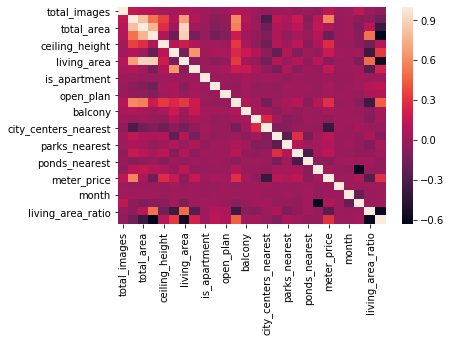

In [35]:
seaborn.heatmap(data.corr())

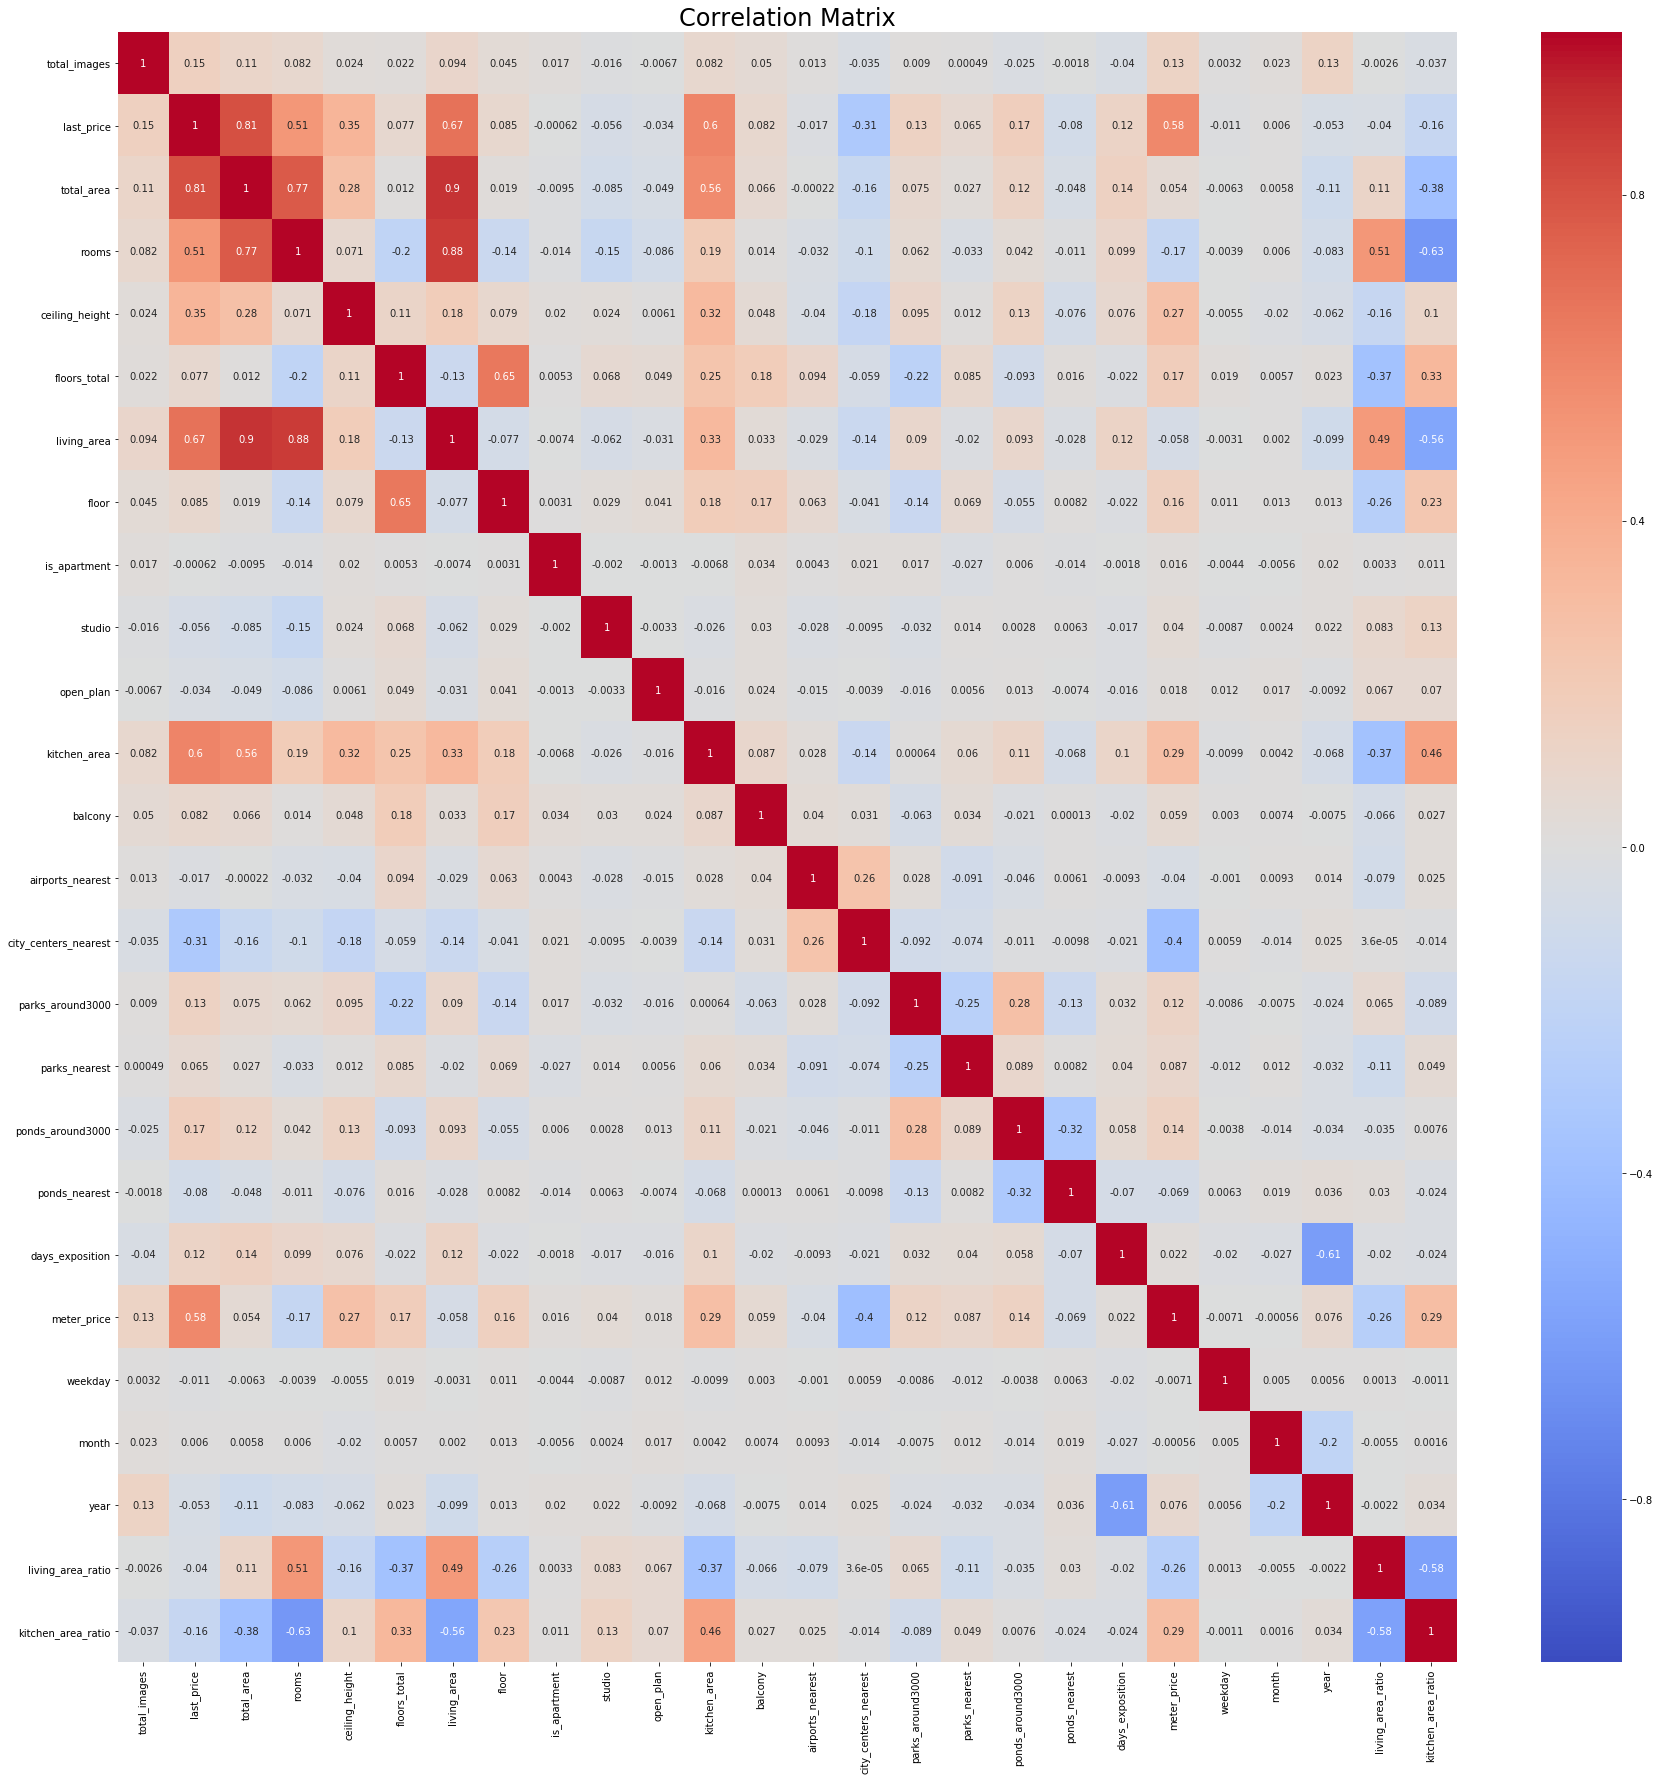

In [36]:
plt.figure(figsize=(30,30))
correlation = seaborn.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
correlation.set_title('Correlation Matrix', fontdict={'fontsize': 24})
plt.show()

- Следующим шагом выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [37]:
top_locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'meter_price', aggfunc=['count', 'mean'])

top_locality_pivot_table.columns = ['count', 'mean']

display(top_locality_pivot_table.sort_values(by='count', ascending = False).head(10))

,count,mean
locality_name,,
Санкт-Петербург,11092,107110.706816
посёлок Шушары,354,77924.468927
Пушкин,267,101686.378277
Колпино,266,75146.018797
посёлок Парголово,259,89879.467181
Петергоф,158,82802.082278
Красное Село,140,72180.464286
Сестрорецк,138,100148.739130
Ломоносов,103,71300.766990


Населённый пункт с самой высокой стоимостью жилья:

In [38]:
top_locality_pivot_table = top_locality_pivot_table.sort_values(by='count', ascending = False).head(10)
display(top_locality_pivot_table.sort_values(by='mean', ascending = False).head(1))

,count,mean
locality_name,,
Санкт-Петербург,11092,107110.706816


Населённый пункт с самой низкой стоимостью жилья:

In [39]:
display(top_locality_pivot_table.sort_values(by='mean', ascending = True).head(1))

,count,mean
locality_name,,
Ломоносов,103,71300.76699


**Итоги:**

Из 10 населённых пунктов с наибольшим числом объявлений самая высокая цена на квартиры - в Санкт-Петербурге, самая низкая - в Выборге.

Построим график зависимости цены от местоположения для наглядности:

Text(0.5, 0, 'locality_name')

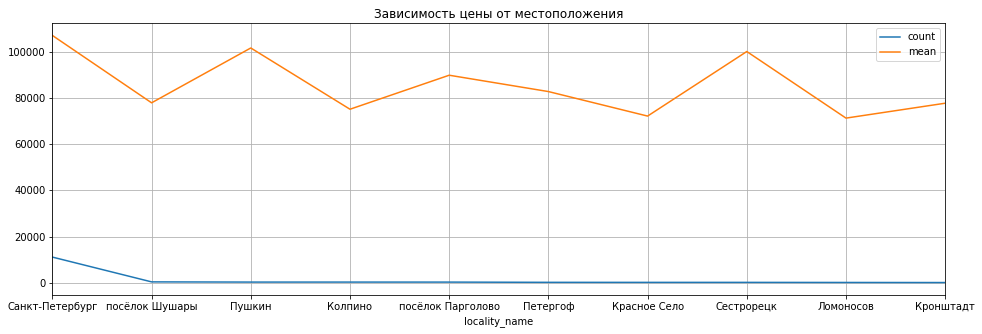

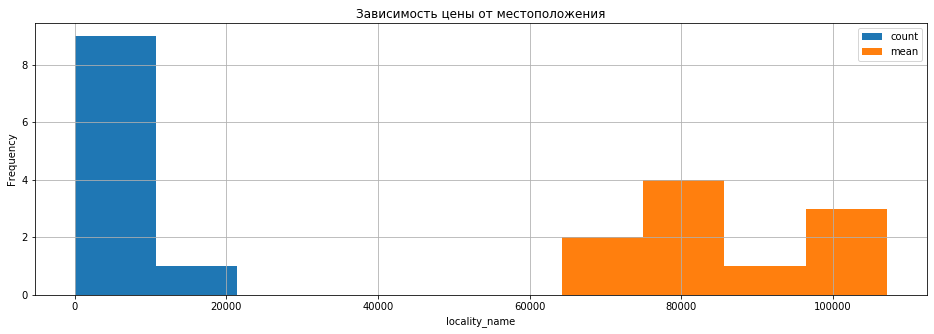

In [40]:
(
top_locality_pivot_table
.plot(grid=True, figsize=(16, 5), title='Зависимость цены от местоположения')
)

(
top_locality_pivot_table
.plot(grid=True, kind = 'hist', figsize=(16, 5), title='Зависимость цены от местоположения')
)
plt.xlabel('locality_name')

Построим более информативную столбчатую диаграмму:

Text(0.5, 1.0, 'Зависимость цены от местоположения')

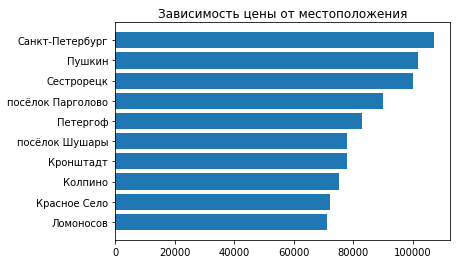

In [41]:
top_locality_pivot_table = top_locality_pivot_table.sort_values(by='mean')
plt.barh(top_locality_pivot_table.index, top_locality_pivot_table['mean'])
plt.title('Зависимость цены от местоположения')

- Следующий шаг:

Изучим предложения квартир по информации о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

Итак, в таблице указано расстояние в метрах - переведем его в км. и округлим:

In [42]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
display((data['city_centers_nearest_km']).head(3))

data['city_centers_nearest_km'] = np.int32(data['city_centers_nearest_km'])
display((data['city_centers_nearest_km']).head(3))

data.head(3)

1    18.603
2    13.933
5    19.143
Name: city_centers_nearest_km, dtype: float64

1    18
2    13
5    19
Name: city_centers_nearest_km, dtype: int32

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_category,meter_price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81,1,82920,1,12,2018,первый,0.460396,0.272277,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558,2,92785,3,8,2015,другой,0.612500,0.148214,13
5,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,155,1,99195,3,11,2017,другой,0.284182,0.386059,19


Выделим квартиры в Санкт-Петербурге. Посчитаем среднюю цену для каждого километра и построим график:

                           meter_price
city_centers_nearest_km               
0                        125230.520000
1                        127382.011111
2                        115184.136364
3                        115548.493617
4                        130692.752174
5                        132327.250639
6                        127463.836364
7                        127808.272401
8                        113535.494033
9                        108176.638258
10                       108419.760563
11                       103964.677828
12                       106862.674897
13                       105043.932684
14                       102810.586882
15                        99680.603220
16                        98902.227376
17                        93521.330049
18                        94214.348148
19                        94335.074627
20                       102678.102041
21                        89239.152318
22                        84648.428571
23                       

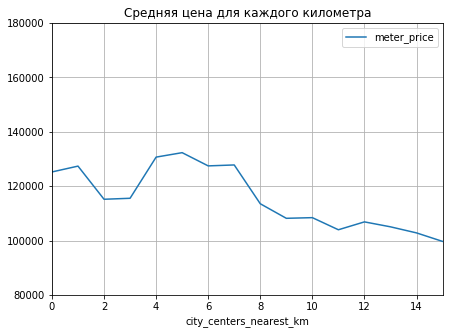

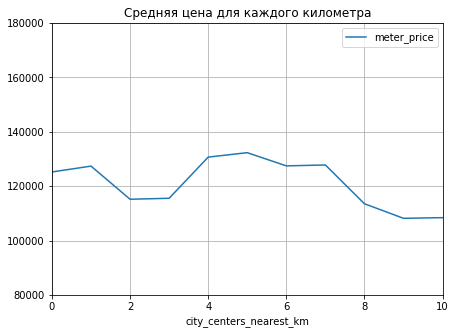

In [43]:
spb_km_pivot_table = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'meter_price', aggfunc = 'mean')
print(spb_km_pivot_table)

spb_km_pivot_table.plot(xlim=(0, 15), ylim=(80000, 180000), grid=True, figsize=(7, 5), title='Средняя цена для каждого километра')

spb_km_pivot_table.plot(grid=True, xlim=(0, 10), ylim=(80000, 180000), figsize=(7, 5), title='Средняя цена для каждого километра')

**Итоги:**

График показывает, что при удалении от центра цена падает. А на более масштабированном графике видно, что центральная зона с наибольшей ценой на жилье находится в радиусе 8 км.

- Последний шаг:

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли сделанные выводы от общих выводов по всему городу?

In [44]:
spb_center = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km <= 8')
spb_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rooms_category,meter_price,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
23,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265,2,66872,5,10,2015,первый,0.478395,0.201646,2
34,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,False,...,644,5,104026,0,6,2017,другой,0.697987,0.114094,3
58,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,False,...,609,2,107972,3,8,2017,последний,0.581081,0.270270,4
60,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,37,3,169491,1,9,2018,другой,0.576271,0.135593,4
67,9,3400000.0,30.0,2018-09-05,1,2.65,5,16.0,1,False,...,14,1,113333,2,9,2018,первый,0.533333,0.233333,8


Зависимость цены в центре от площади:

-0.04888965583011283

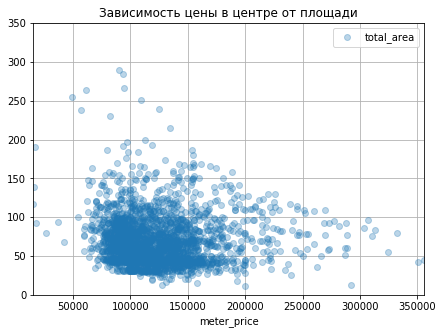

In [45]:
spb_center.plot(x='meter_price', y='total_area', style='o', ylim=(0, 350), grid=True, figsize=(7, 5), alpha=0.3, title='Зависимость цены в центре от площади')

spb_center['total_area'].corr(spb_center['meter_price'])

**Итоги:**

Коэффициент корреляции Пирсона еще меньше по сравнению с таковым по всему городу. Т.е. зависимость цены за квадратный метр от площади квартир в центре слабая.

Зависимость цены в центре от числа комнат:

-0.23689918172717442

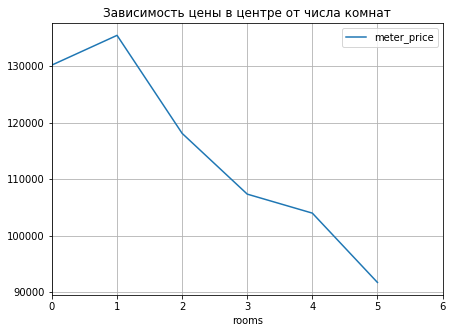

In [46]:
(
spb_center
.pivot_table(index='rooms', values='meter_price', aggfunc='median')
.plot(grid=True, xlim=(0, 6), figsize=(7, 5), title='Зависимость цены в центре от числа комнат')
)

spb_center['rooms'].corr(spb_center['meter_price'])

**Итоги:**

Коэффициент корреляции очень мал, но график показывает, что цена за квадратный метр снижается при увеличении количества комнат, возможно, там имеют влияние другие параметры.

Зависимость цены в центре от высоты потолков:

0.08672407474234847

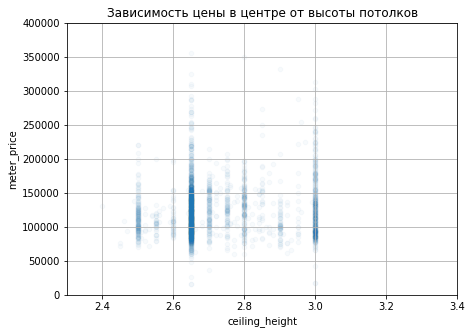

In [47]:
spb_center.plot(x='ceiling_height', y='meter_price', kind='scatter', xlim=(2.3, 3.4), ylim=(0, 400000), grid=True, figsize=(7, 5), alpha=0.03, title='Зависимость цены в центре от высоты потолков')

spb_center['ceiling_height'].corr(spb_center['meter_price'])

**Итоги:**

Связь между ценой и высотой потолков в центре тоже очень мала.

Зависимость цены от этажа (первый, последний или другой) квартиры в центре:

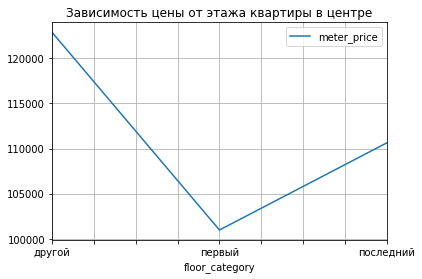

In [48]:
(
spb_center
.pivot_table(index='floor_category', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(6, 4), title='Зависимость цены от этажа квартиры в центре')
)

**Итоги:**

И снова, самые дешевые квартиры - на первом этаже. А квартиры на последнем, и особенно на других этажах, стоят еще дороже тех же из общей выборки.

Зависимость цены на квартиры в центре от удалённости от центра:

-0.04117965582176859

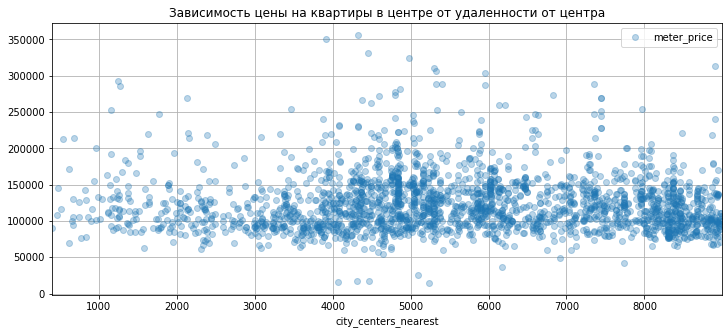

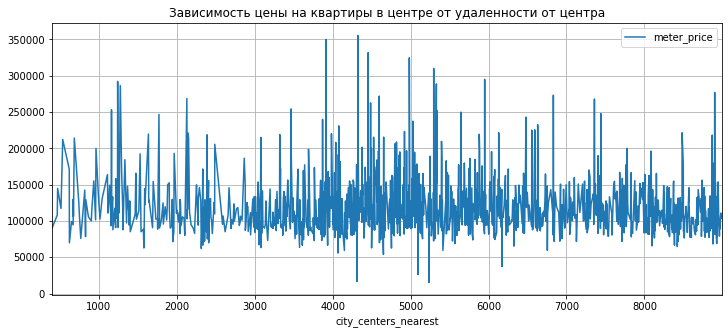

In [49]:
spb_center.plot(x='city_centers_nearest', y='meter_price', style='o', grid=True, figsize=(12, 5), alpha=0.3, title='Зависимость цены на квартиры в центре от удаленности от центра')

(
spb_center
.pivot_table(index='city_centers_nearest', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(12, 5), title='Зависимость цены на квартиры в центре от удаленности от центра')
)

spb_center['city_centers_nearest'].corr(spb_center['meter_price'])

**Итоги:**

Связь не прослеживается в отличие от общей выборки, вероятно, потому, что в этой выборке все квартиры дорогие в связи с близостью к центру.

Зависимость цены на жилье в центре от даты размещения: дня недели, месяца и года.

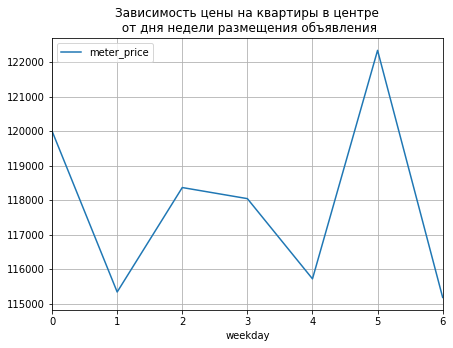

In [50]:
(
spb_center
.pivot_table(index='weekday', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(7, 5), title='Зависимость цены на квартиры в центре\n от дня недели размещения объявления')
)

**Итоги:**

Результаты немного отличаются от общей выборки: во вторник, пятницу и воскресенье цены ниже, а к субботе сильно повышаются.

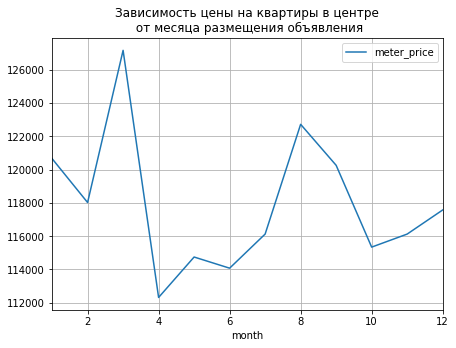

In [51]:
(
spb_center
.pivot_table(index='month', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(7, 5), title='Зависимость цены на квартиры в центре\n от месяца размещения объявления')
)

**Итоги:**

Судя по графику, ситуация здесь схожа с общей выборкой. Летом цена снижается (самая низкая в июне), а в августе повышается. Только самой высокой отметки цена достигает в марте, а не в апреле, когда она является самой низкой.

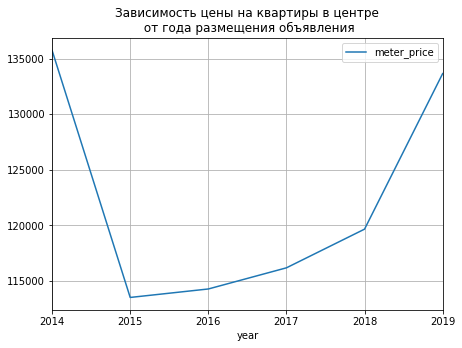

In [52]:
(
spb_center
.pivot_table(index='year', values='meter_price', aggfunc='median')
.plot(grid=True, figsize=(7, 5), title='Зависимость цены на квартиры в центре\n от года размещения объявления')
)

**Итоги:**

Результаты схожи с общей выборкой - цены упали после 2014 г., а после 2017 начали расти.

Рассмотрим параметры (например, площадь и цену за квадратный метр) для центра и для остальной части города на одном рисунке:

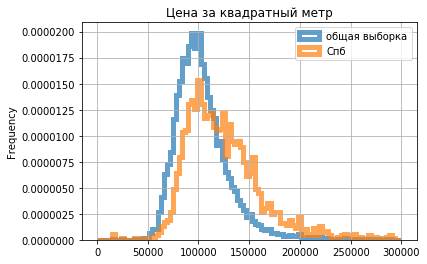

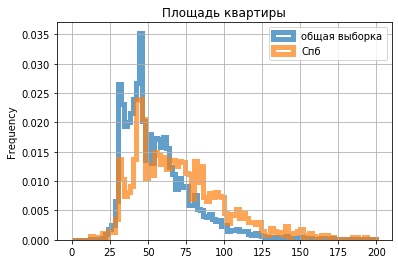

In [53]:
ax = data.plot(
    kind='hist',
    y='meter_price',
    histtype='step',
    range=(0, 300000),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='общая выборка',
    title='Цена за квадратный метр',
    density=True
)
spb_center.plot(
    kind='hist',
    y='meter_price',
    histtype='step',
    range=(0, 300000),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='Спб',
    ax=ax,
    grid=True,
    legend=True,
    density=True
)
print()

ax = data.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='общая выборка',
    title='Площадь квартиры',
    density=True
)
spb_center.plot(
    kind='hist',
    y='total_area',
    histtype='step',
    range=(0, 200),
    bins=100,
    linewidth=5,
    alpha=0.7,
    label='Спб',
    ax=ax,
    grid=True,
    legend=True,
    density=True
)

## Общий вывод

**Объект нашего исследования:** данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель:** научиться определять рыночную стоимость объектов недвижимости.

При первичной обработке данных были обработаны пропуски в данных, а самые данные приведены к надлежащему виду.

Таблица была дополнена следующей информацией:
цена квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры (первый, последний, другой); соотношение жилой и общей площади; соотношение площади кухни к общей.

**Результаты исследовательского анализа данных по всей выборке:**

**Итог по площади квартир:**

Минимальная площадь квартир - 12 м², максимальная - 900 м², среднее значение - 60 м², а медиана - 52 м².

**Итог по цене квартир:**

Минимальная стоимость квартир составляет 1,2 млн. руб., максимальная - 7,5 млн. руб., средняя стоимость - 6,5 млн. руб., а медиана - 4,6 млн. руб.

**Итог по числу комнат в квартирах:**

Минимальное число комнат - 1, максимальное - 19, среднее - 2.

**Итог по высоте потолков в квартирах:**

Минимальная высота - 1 м, максимальная - 100 м, среднее значение - 2,7 м, а медиана - 2,6 м.

**Время продажи квартиры:**

есть квартиры, которые продавались значительно дольше медианного времени (73 дня), которое далеко от среднего (156 дней).
После обработки аномалий медианное время продажи квартиры составляет 114 дней, а среднее - 195.

**Факторы, влияющие на стоимость квартиры:**

Зависимость цены от площади: сильно не заметна.

Зависимость цены от числа комнат: самая высокая стоимость квадратного метра у 1-комнатной квартиры, и по сравнению с ней сильно снижена у 3-хкомнатной квартиры.

Зависимость цены от удалённости от центра: чем ближе к центру, тем дороже стоимость квадратного метра.

Зависимость цены от этажа (первый, последний или другой): на первом этаже - самые дешевые квартиры, цена на квартиры на последнем этаже повышается, но дороже оцениваются квартиры на других этажах.

Зависимость цены от даты размещения: дня недели, месяца и года.
В будние дни и в субботу цена высокая, в пятницу и воскресенье снижается.
Весной цена достигает своего пика, самое высокое значение - в апреле. Высока цена в августе и ноябре. Невысокие цены на квартиры в мае, июне и октябре.
С 2014 г. цена падала с самым низким показателем в 2016 г., а после 2017 г. стала расти.

**Результаты исследования 10-ти населённых пунктов с наибольшим числом объявлений:**

Самая высокая цена на квартиры - в Санкт-Петербурге, самая низкая - в Выборге.
Центральная зона с наибольшей ценой на жилье находится в радиусе 8 км. Цена падает при удалении от центра.

**Зависимость цены за квадратный метр от площади квартир** в центре слабее, чем в общей выборке.

**Зависимость цены в центре от числа комнат** невысока, цена за квадратный метр снижается при увеличении количества комнат.

**Связь между ценой и высотой потолков в центре** тоже очень мала.

**Зависимость цены от этажа квартиры в центре:** и здесь самые дешевые квартиры - на первом этаже. А квартиры на последнем, и особенно на других этажах, стоят еще дороже тех же из общей выборки.

**Зависимость цены на квартиры в центре от удалённости от центра** не прослеживается в отличие от общей выборки, вероятно, в связи с узкой выборкой квартир по параметру, влияющему на стоимость.

**Зависимость цены на жилье в центре от даты размещения: дня недели, месяца и года.**
Результаты немного отличаются от общей выборки: во вторник, пятницу и воскресенье цены ниже, а к субботе сильно повышаются.
Судя по графику, ситуация по месяцам и годам здесь так же схожа с общей выборкой. Летом цена снижается (самая низкая в июне), а в августе повышается. Только самой высокой отметки цена достигает в марте, а не в апреле, когда она является самой низкой.
После 2014 г. цены упали, а после 2017 начали расти.